# Check for Amplification Bias in Reads

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import scipy.stats

from collections import Counter

from turtles.turtles_utils import *
#from turtles.turtles_utils_bcKludge import read_in_vivo_seqs_bc

In [2]:
base_path = '/mnt/c/Users/jonst/Northwestern University/Tyo Lab - Shared group resources' \
            '/Publications Presentations & Proposals from Group/Manuscripts' \
            '/2022 - Callisto Strutz - tdt data storage'

#: Overall directory for TdT project data and analysis
tdt_dir = f'{base_path}/02 Analyzed data/'

#: Subdirectory for NGS run
data_dir = f'{base_path}/01 Raw data/20220407_pooled_data/'

#: Directory to save generated figures in
figure_dir = f'{base_path}/02 Analyzed data/preliminary_figures/Hello_World_2/'

In [3]:
#import conditions table
conditions_df = pd.read_csv(f'{tdt_dir}/_decodingResources/ConditionsTablePooled.csv', header=0)
conditions_df

,Filename,Sample,Category,Replicate
0,PC1,PC1,c,1
1,PC2,PC2,c,1
2,PC3,PC3,c,1
3,PC4,PC4,c,1
4,PC5,PC5,c,1
5,PC6,PC6,c,1
6,PC7,PC7,c,1
7,PR1,PR1,r,1
8,PR2,PR2,r,1
9,PR3,PR3,r,1


In [8]:
# split controls and message
controls_df = conditions_df[conditions_df['Category']=='c']
message_df = conditions_df[conditions_df['Category']=='r']

controls_df = controls_df.reindex(columns=['Filename', 'Sample', 'Replicate'])
message_df = message_df.reindex(columns=['Filename','Sample', 'Replicate'])

In [9]:
controls_df

,Filename,Sample,Replicate
0,PC1,PC1,1
1,PC2,PC2,1
2,PC3,PC3,1
3,PC4,PC4,1
4,PC5,PC5,1
5,PC6,PC6,1
6,PC7,PC7,1


In [10]:
message_df

,Filename,Sample,Replicate
7,PR1,PR1,1
8,PR2,PR2,1
9,PR3,PR3,1
10,PR4,PR4,1
11,PR5,PR5,1
12,PR6,PR6,1
13,PR7,PR7,1


In [11]:
# hgRNA reverse complements
hgRNA_dict_rc = {'A21': 'TGTGGGGTGGAGGGGAC',
                 'D21': 'CTTGGCCGTAGCGTGAC',
                 'E21': 'GTCAGTATCTCTGGAAC'}

seqs_dict, hgRNAs, barcodes, insert_barcodes = read_in_vivo_seqs_R2(data_dir, hgRNA_dict_rc)


Read 1293933 sequences in PC1_S53_L001_R2_001.fastq.gz ...
Number cut and inserted into: 100497
Average length (excluding 0-length seqs): 2.48


Read 1336818 sequences in PC2_S54_L001_R2_001.fastq.gz ...
Number cut and inserted into: 90078
Average length (excluding 0-length seqs): 2.46


Read 1211911 sequences in PC3_S55_L001_R2_001.fastq.gz ...
Number cut and inserted into: 73925
Average length (excluding 0-length seqs): 2.35


Read 1533254 sequences in PC4_S56_L001_R2_001.fastq.gz ...
Number cut and inserted into: 83336
Average length (excluding 0-length seqs): 2.31


Read 1354247 sequences in PC5_S57_L001_R2_001.fastq.gz ...
Number cut and inserted into: 75200
Average length (excluding 0-length seqs): 2.36


Read 1075071 sequences in PC6_S58_L001_R2_001.fastq.gz ...
Number cut and inserted into: 52252
Average length (excluding 0-length seqs): 2.28


Read 696380 sequences in PC7_S59_L001_R2_001.fastq.gz ...
Number cut and inserted into: 30971
Average length (excluding 0-length seqs)

In [12]:
for filename, seqs in seqs_dict.items():
    print(filename)
    counts = Counter(seqs)
    print(counts)
    print('\n')

PC1_S53
Counter({'C': 42941, 'CC': 6702, 'GG': 2614, 'GA': 2586, 'CG': 2270, 'CT': 1807, 'GGC': 1550, 'G': 1385, 'GCC': 1370, 'GGCCC': 1359, 'TCC': 1276, 'GCCC': 1134, 'T': 1040, 'TG': 976, 'CA': 953, 'GTC': 922, 'GAC': 856, 'GGGGCC': 806, 'CTC': 728, 'A': 689, 'GGGGGC': 689, 'AGGC': 681, 'GGGCAA': 678, 'GGTGTC': 677, 'GGTCCC': 675, 'GCTC': 666, 'AG': 662, 'TTAA': 648, 'GGGGGA': 639, 'GCCCC': 635, 'ACGGCA': 600, 'TCTC': 599, 'GGCTCCC': 590, 'CTG': 576, 'GCGCG': 561, 'CCT': 560, 'TTC': 559, 'CGGGCAA': 556, 'GGCATC': 555, 'GAGA': 554, 'GGT': 550, 'CTGCCT': 547, 'GGCT': 537, 'GGGTC': 512, 'TC': 503, 'GGGTGAT': 501, 'CGCCTC': 481, 'AGCCCT': 466, 'GGGAGGG': 385, 'GAGCT': 381, 'GGCCCC': 380, 'GGGTAT': 364, 'CCTTAC': 353, 'CGAC': 345, 'TGG': 334, 'ACC': 328, 'GGGTTA': 325, 'GACCC': 320, 'GAG': 318, 'AAGCCC': 316, 'GGTCCCC': 294, 'GGCTT': 285, 'CGCCCCC': 285, 'CGGC': 284, 'TTGCT': 280, 'GGTCATC': 263, 'GGGC': 261, 'CGCTA': 260, 'TGCCCCC': 260, 'CCCGAC': 252, 'CTAC': 251, 'AGG': 232, 'GCCTCGC':

Counter({'C': 32318, 'CC': 3225, 'CG': 3192, 'GG': 2324, 'CT': 1415, 'CCC': 1184, 'GGC': 1043, 'G': 1009, 'GCC': 961, 'CTC': 930, 'GGCCC': 828, 'TC': 759, 'T': 737, 'GCCC': 656, 'GGGC': 656, 'GC': 598, 'TCC': 574, 'A': 557, 'GT': 551, 'TTC': 545, 'CGCC': 493, 'CGG': 473, 'CGGCC': 467, 'AG': 411, 'GCCCCC': 404, 'CGC': 396, 'TA': 393, 'GCTC': 376, 'CCA': 362, 'TG': 357, 'GCCA': 326, 'GGGG': 318, 'TCA': 318, 'GGA': 318, 'GCCT': 315, 'CCT': 302, 'CCCC': 301, 'TT': 286, 'AAG': 285, 'GGCCA': 235, 'GACC': 225, 'GGCC': 224, 'GGAGATT': 211, 'GGT': 206, 'CGGC': 195, 'GACCC': 194, 'GGGT': 193, 'GCCG': 192, 'GTTTCC': 191, 'CTCC': 191, 'GCT': 190, 'CGACC': 189, 'GGGAC': 188, 'TTCCCC': 186, 'GGGATC': 185, 'TGGGC': 185, 'CTT': 181, 'GAACC': 176, 'GGAC': 174, 'GGCCCC': 174, 'GGGCCA': 172, 'TGA': 171, 'GA': 171, 'GGGTTCT': 171, 'TTCC': 167, 'ACCCAT': 167, 'GGTCACG': 166, 'CGA': 166, 'CGGCCCC': 166, 'ACC': 165, 'CGGGC': 164, 'CCCT': 164, 'CAGC': 163, 'TTT': 159, 'GGCTA': 159, 'GAACTC': 158, 'GCTA': 158,

In [37]:
for filename, seqs in seqs_dict.items():
    print(filename)
    counts = Counter(seqs)
    print(counts)
    print('\n')

A1_S1
Counter({'G': 5011, 'GG': 1016, 'CC': 550, 'GGG': 396, 'GC': 334, 'AG': 273, 'A': 205, 'C': 178, 'GGGC': 145, 'GGT': 144, 'GAC': 138, 'GCC': 136, 'GGGCC': 125, 'GAA': 122, 'GCCG': 118, 'GA': 111, 'GGC': 107, 'CG': 102, 'GGA': 96, 'GAG': 93, 'TCCG': 90, 'GGACC': 85, 'CCC': 84, 'CCTG': 83, 'TG': 82, 'AGC': 78, 'AGG': 77, 'AGAGG': 73, 'T': 71, 'GAGACC': 70, 'CCCG': 65, 'GGGAC': 65, 'GGGGAC': 64, 'AAA': 63, 'TGG': 60, 'GGCC': 60, 'GGGGTT': 55, 'GAGAAAAG': 50, 'GCTTCC': 47, 'GGGG': 46, 'TC': 46, 'GCG': 45, 'AGA': 45, 'GGGACCGCA': 43, 'GACCCC': 41, 'CT': 41, 'GGGGCC': 40, 'TCCC': 39, 'CGG': 38, 'AGAA': 37, 'ACCTC': 37, 'AGGT': 37, 'GGAG': 37, 'AGGCC': 37, 'TTC': 36, 'AA': 36, 'CA': 35, 'GTCCC': 35, 'TGGC': 35, 'CGCG': 34, 'AGGC': 34, 'GGGGACCCT': 34, 'GAGT': 34, 'CCCGGAACG': 34, 'CCCC': 33, 'ATGGAA': 33, 'GGAGAGAA': 33, 'GGAGGACC': 33, 'AGGTCA': 32, 'CCTC': 32, 'GACCG': 31, 'GAGGA': 31, 'GCT': 31, 'GCCAGGGGC': 31, 'GCCCG': 31, 'GGTCCT': 30, 'CTCTTCCT': 30, 'AGGG': 30, 'ACCC': 30, 'GGAG

Text(0, 0.5, 'Count')

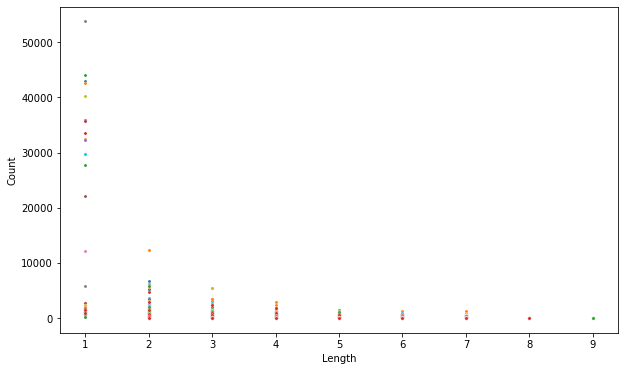

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

for filename, seqs in seqs_dict.items():
    counts = Counter(seqs)
    lens = []
    counts_list = []
    for seq, count in dict(counts).items():
        lens.append(len(seq))
        counts_list.append(count)
    sns.scatterplot(x=lens, y=counts_list, s=10, ax=ax)
    
plt.xlabel('Length')
plt.ylabel('Count')

(0.0, 5000.0)

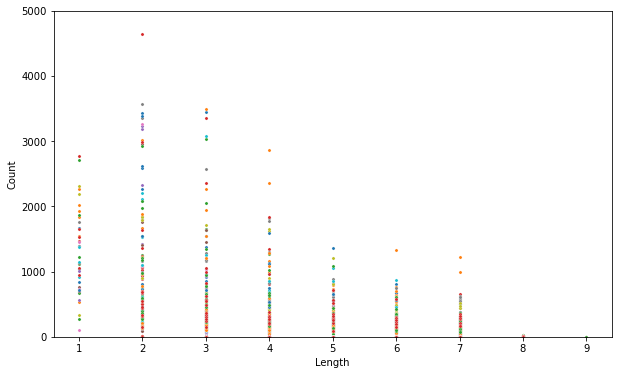

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

for filename, seqs in seqs_dict.items():
    counts = Counter(seqs)
    lens = []
    counts_list = []
    for seq, count in dict(counts).items():
        lens.append(len(seq))
        counts_list.append(count)
    sns.scatterplot(x=lens, y=counts_list, s=10, ax=ax)
    
plt.xlabel('Length')
plt.ylabel('Count')

plt.ylim(0, 5000)